# <a id='toc1_'></a>[Exploratory Data Analysis](#toc0_)

The Parkinson's Disease Freezing of Gait Dataset comprises some 979 files, including study metadata, series metadata, model training and test data as follows:

| #     | Group           | Dataset               | Description                                                                            | # Files |
|-------|-----------------|-----------------------|----------------------------------------------------------------------------------------|---------|
| 1     | study metadata  | subjects.csv          | Metadata for each subject in the study.                                                | 1       |
| 2     | study metadata  | events.csv            | Metadata for each FoG event in all data series.                                        | 1       |
| 3     | study metadata  | tasks.csv             | Task metadata for series in the defog dataset.                                         | 1       |
| 4     | series metadata | daily_metadata.csv    | Metadata for each series in the daily dataset                                          | 1       |
| 5     | series metadata | defog_metadata.csv    | Subject, visit and medication metadata for each series in the defog   dataset.         | 1       |
| 6     | series metadata | tdcsfog_metadata.csv  | Subject,visit, test, and medication metadata for each series in the   tdcsfog dataset. | 1       |
| 7     | model           | sample_submission.csv | A submission file in the correct format.                                               | 1       |
| 8     | model           | tdcsfog training data | Data series collected in the lab                                                       | 833     |
| 9     | model           | defog training data   | Data series collected in the subject's home                                            | 91      |
| 10    | model           | notype training data  | Data series from the defog dataset, lacking event-type annotations                     | 46      |
| 11    | model           | test data             | A test tdsfog and defog folder containing Time, AccV, AccML, and   AccAP               | 2       |
| Total |                 |                       |                                                                                        | 979     |

We'll approach these data in groups, each with varying EDA objectives.
1. **Study Metadata**: Provides data about the study subjects, events, and tasks.
2. **Series Metadata**: Contains the metadata for the tfdcsfog, defog, and daily series datasets.
3. **Series Data**: Core training and test data.

**Table of contents**<a id='toc0_'></a>    
- [Exploratory Data Analysis](#toc1_)    
  - [Study Metadata](#toc1_1_)    
    - [Subject Dataset](#toc1_1_1_)    
    - [Age and Disease Year Demographics](#toc1_1_2_)    
    - [Unified Parkinson's Disease  Rating Scale (UPDRS)](#toc1_1_3_)    
    - [Training Data](#toc1_1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from parkinsons.analysis.subject import Subject
from parkinsons.config import Visual
from parkinsons.analysis.fog import FOGDataset

sns.set_style(Visual.style)
_ = sns.dark_palette(Visual.palette.color, reverse=Visual.palette.reverse, as_cmap=Visual.palette.as_cmap)

In [2]:
# Filepaths and Directories
SUBJECTS = "data/subjects.csv"
TASKS = "data/tasks.csv"
EVENTS = "data/events.csv"
TDCSFOG = "data/tdcsfog_metadata.csv"
DEFOG = "data/defog_metadata.csv"
DAILY = "data/daily_metadata.csv"

## <a id='toc1_1_'></a>[Study Metadata](#toc0_)

Study metadata will provide a starting point for the analysis, describing the study subjects, the FoG events in the data series, and the seven tasks types in the DeFOG protocol. We begin with the subject dataset.

### <a id='toc1_1_1_'></a>[Subject Dataset](#toc0_)

For each subject, the following data were collected: 

| # | Variable     | Definition                                                                             |
|---|--------------|----------------------------------------------------------------------------------------|
| 1 | Visit        | The visit to the subject's home. Only available for the daily and defog   datasets.    |
| 2 | YearsSinceDx | Years since Parkinson's diagnosis.                                                     |
| 3 | UPDRSIIIOn   | Unified Parkinson's Disease Rating Scale score ON medication                           |
| 4 | UPDRSIIIOff  | Unified Parkinson's Disease Rating Scale score OFF medication                          |
| 5 | NFOGQ        | Self-reported FoG questionnaire score. See   https://pubmed.ncbi.nlm.nih.gov/19660949/ |

#### Data Profile 

In [3]:
subjects = Subject(name="Subjects", filepath=SUBJECTS)

,Column,Dtype,Valid,Null,Validity,Unique,Cardinality,Size
0,Subject,object,173,0,1.00,136,0.79,10899
1,Visit,float64,111,62,0.64,2,0.01,1384
2,Age,int64,173,0,1.00,34,0.20,1384
3,Sex,object,173,0,1.00,2,0.01,10034
4,YearsSinceDx,float64,173,0,1.00,30,0.17,1384
5,UPDRSIII_On,float64,172,1,0.99,51,0.29,1384
6,UPDRSIII_Off,float64,132,41,0.76,47,0.27,1384
7,NFOGQ,int64,173,0,1.00,22,0.13,1384


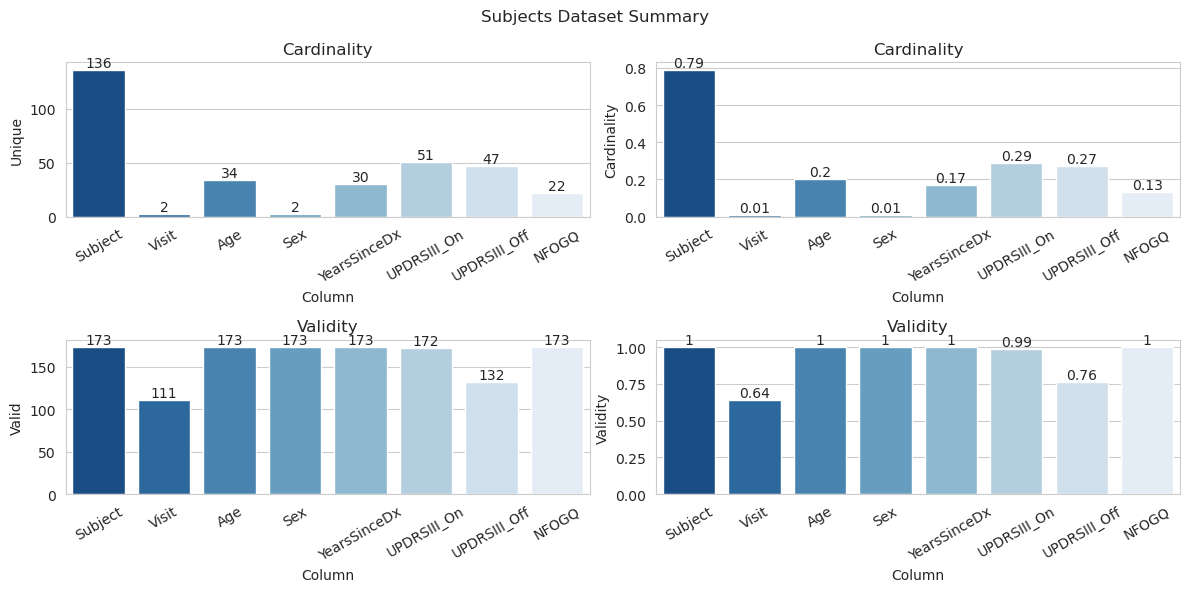

In [4]:
subjects.info(table=True, plot=True)

Cardinality, and validity of the dataset are summarized above. 
- **Subject**: Of the 173 values, we have 136 or 79% unique Subjects.
- **Visit**: Two distinct values indicate the visits for the defog and daily series.
- **Age**: This ordinal contains 34 unique values and no null values.
- **Sex**: Contains the gender of each Subject. Genders are restricted to two values: M and F.
- **YearsSinceDx**: The number of years since the Subject was diagnosed with Parkinson's Disease has 30 unique non-null values.
- **UPDRSIII_On**: Scores for the Unified Parkinson's Disease Rating Scale (UPDRS) with Medication has zero null values. 
- **UPDRSIII_Off**: There are 132 unique scores for the UPDRS without medication, with a 76% validity.
- **NFOGQ**: Scores for the New Freezing of Gait Questionnaire (NFOG-Q) for each subject.

#### Univariate Analysis
Visit is a low-cardinality (2) variable with 64% validity.

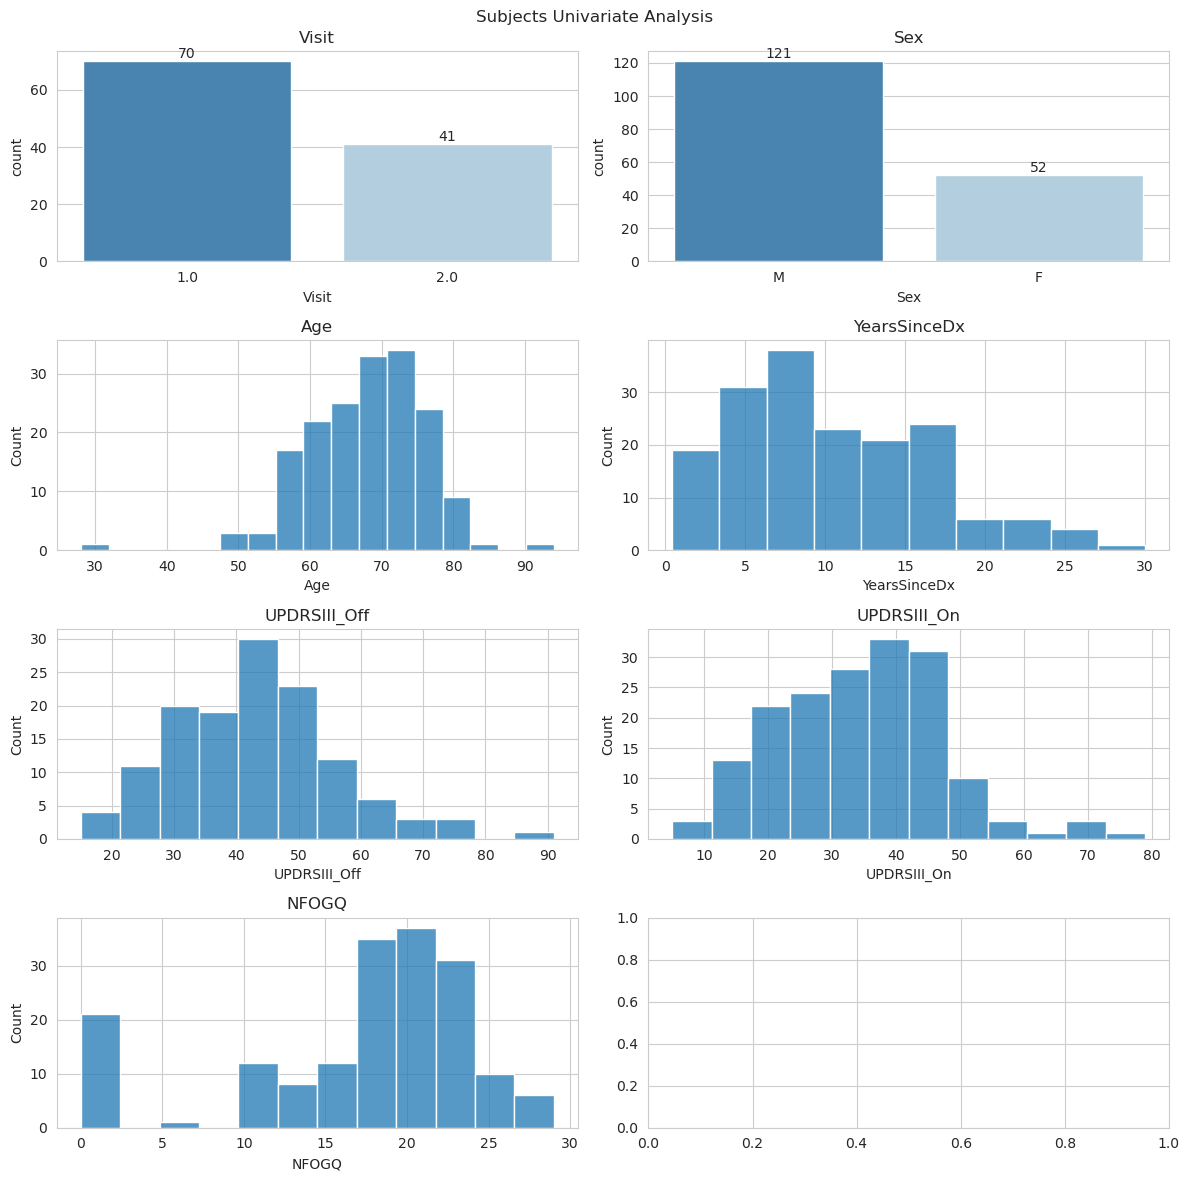

In [5]:
subjects.univariate()

### <a id='toc1_1_2_'></a>[Age and Disease Year Demographics](#toc0_)

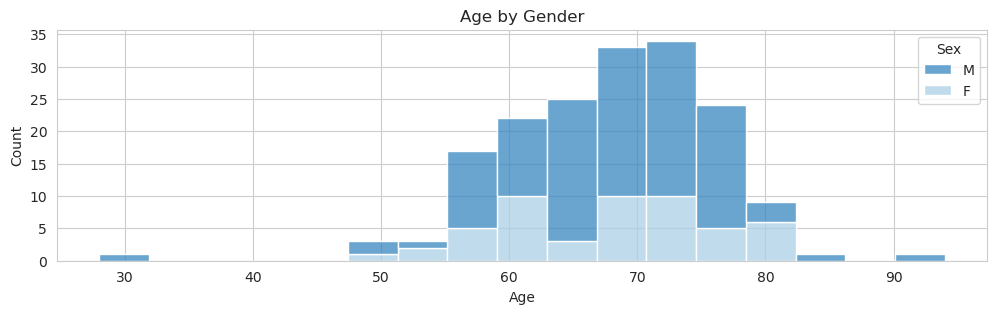

In [6]:
subjects.age()

In [7]:
subjects.describe(group_var="Sex").Age_by_Sex

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,52.00,67.81,7.95,51.00,60.00,69.00,73.00,82.00
M,121.00,67.74,8.02,28.00,63.00,68.00,73.00,94.00


For the 121 male subjects and 52 female participants, age centers around 67 to 68 years, for both female and male subjects; though, a 28 year in the male subjects skews the distribution pulling the average slightly lower than that of the female participants as indicated below.

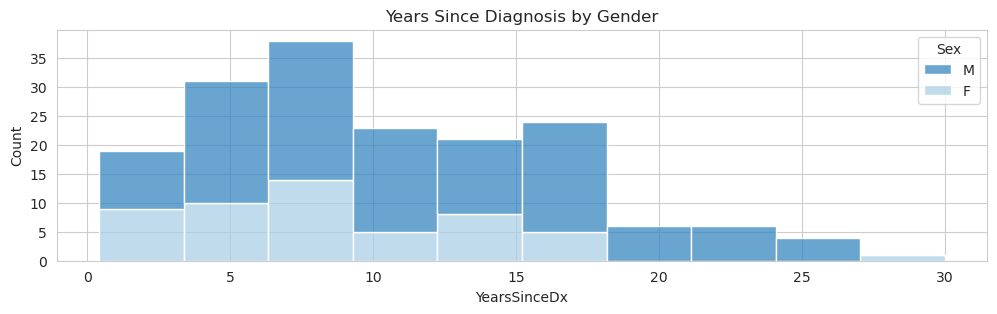

In [8]:
subjects.years()

In [9]:
subjects.describe(group_var="Sex").YearsSinceDx_by_Sex

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,52.00,8.64,5.69,0.42,4.38,7.50,13.00,30.00
M,121.00,11.13,6.41,1.00,6.00,10.00,16.00,27.00


The right skew in the years since diagnosis, reveals that the male participants have been living with the disease, on average nearly 30% longer than the female subjects in the dataset. 

### <a id='toc1_1_3_'></a>[Unified Parkinson's Disease  Rating Scale (UPDRS)](#toc0_)
The UPD rating scale is used to map and score the longitudinal behavioral, severity and progression of Parkinson's Disease. The instrument consists of 42 questions, divided into four categories: 
- I Mental Function, Behavior and Mood; 
- II: Activities of Daily Living; 
- III Motor Examination; and 
- IV: Complications of Therapy. 

Thirty-five items are scored on a five-point scale (0-4). The remaining seven items are measured on a three-point scale (0-2). Subjects are administered the examination while on and off treatment medication. The distribution of UPDRS scores, off and on medication, are as follows.

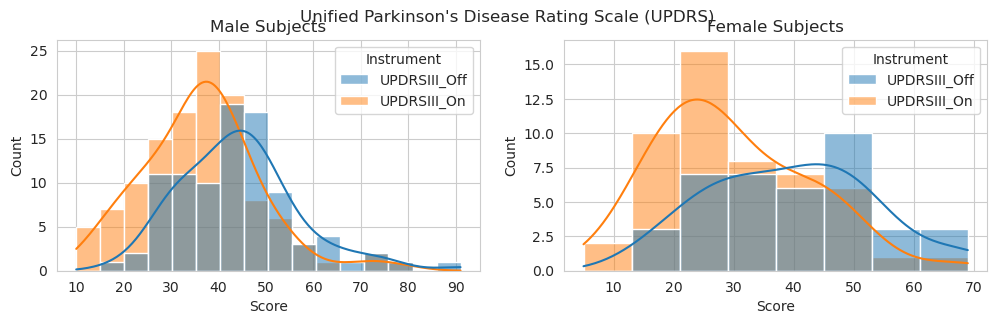

In [10]:
subjects.updrs()

As one might expect, the data indicate higher scores, and presumably greater symptom severity, in the off medication condition for both male and female subjects. 

In [11]:
subjects.describe_updrs(group_var="Instrument", filter_var="Sex", filter_val="M").Score_by_Instrument_filter_by_Sex_as_M


,count,mean,std,min,25%,50%,75%,max
Instrument,,,,,,,,
UPDRSIII_Off,93.00,44.26,12.56,18.00,35.00,44.00,50.00,91.00
UPDRSIII_On,121.00,36.21,12.25,10.00,28.00,37.00,43.00,79.00


The descriptive statistics for the scores of male participants confirm a higher centrality for the distribution of UPDRS scores in the off-medication condition. Do distributions differ to a statistically significant degree? Probably!

Checking the statistics for the female subject scores, we see what one would expect.

In [12]:
subjects.describe_updrs(group_var="Instrument", filter_var="Sex", filter_val="F").Score_by_Instrument_filter_by_Sex_as_F

,count,mean,std,min,25%,50%,75%,max
Instrument,,,,,,,,
UPDRSIII_Off,39.00,39.59,13.60,15.00,28.50,41.00,49.00,69.00
UPDRSIII_On,51.00,29.69,12.80,5.00,21.00,27.00,38.00,67.00


The on-medication condition for the female subjects exhibits lower scores than those off-medication. Are the differences signficant? 

First, lets compare the on/off medication UPDRS score distributions for the male subjects.  

Subjects have between 2 and 24 series' in the tDCSFOG dataset; the average is a bit over thirteen, twelve is the median. With the exception of four, subjects conducted all three fog-provoking tests; the majority with and without medication. In terms of visits, a plurality of subjects were tested over four visits, about 1/4 were performed in two visits, and the rest in one or three lab  visits. 

Data for each series was captured in a csv file and split into 

### <a id='toc1_1_4_'></a>[Training Data](#toc0_)
